In [51]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from scipy.optimize import dual_annealing

In [52]:
'''
April 1: Add noise.
'''

'''
March 24: Damn! This looks good.

Happy with how this turned out. Now to see how spring-constant solving
scales when we add noise...
'''

# Adapting coupled springs.
# From personal notebook, March 24

N = 5 # number of masses (may accidentally call this the number of springs)
d = 1 # distance between rest positions (uniform)
k = np.pi # spring const

# generalize to allow different spring constants on different springs..
K = np.ones(N) * k

x0 = 0. # LHS resting board is at position x0

# set rest positions of springs + boards
R = np.arange(0, N + 1 + 1, d, dtype=np.float_)

# set initial positions of springs
X = np.copy(R)
X[1] -= 0.8 
X[2] -= 0.4

DX = X - R

F_accel = lambda DX: -K * (DX[1:-1] - DX[:-2]) + K * (DX[2:] - DX[1:-1])


DX

F_accel(DX) # looks okay.

# Set up the linear system.
XV = np.zeros(2 * N)

# Initial conditions?
XV[:N] = X[1:-1] # Initial positions of the springs
XV[N:] = np.zeros(N) # initial velocities of the springs

# Although this is an autonomous system
def F(t, XV):
    
    DX = np.hstack( ([0.], XV[:N], [float(N + 1)]) ) - R # joins break for
    
    # print(F_accel(DX))
    res = np.hstack(( XV[N:], F_accel(DX) )
                    )
    return res

F(0, XV)

t0, tf = 0., 10.
nframes = 2 ** 6

# set the initial condition...
IC = XV

soln = solve_ivp(F, [t0, tf], IC,
                t_eval=np.linspace(t0,tf,nframes))


# Add noise to the data?

absolute_noise_limit = 0.05
noise = np.random.standard_normal(soln.y.shape) * absolute_noise_limit



soln.y.shape
noise.shape

noise[1,1]
noisy_soln = soln.y + noise

noisy_soln.shape


(10, 64)

In [39]:
soln.y.shape

soln.t.shape

(64,)

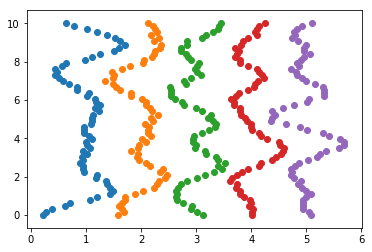

In [40]:
# plot the positions of the springs....

for i in range(N):
    #plt.scatter(soln.y[i,:], soln.t)
    plt.scatter(noisy_soln[i,:], soln.t)

In [ ]:
# Can we also try the noisy harmonic oscillator?




In [49]:
# stocastically vary K?
N = 5
# Set up the linear system.
K = np.ones(N)

F_accel = lambda DX: -K * (DX[1:-1] - DX[:-2]) + K * (DX[2:] - DX[1:-1])

XV = np.zeros(2 * N)

# Initial conditions?
XV[:N] = X[1:-1] # Initial positions of the springs
XV[N:] = np.zeros(N) # initial velocities of the springs

# Although this is an autonomous system
noise_factor = 0.05
def F(t, XV):
    K = 1. + np.random.standard_normal(N) * noise_factor
    F_accel = lambda DX: -K * (DX[1:-1] - DX[:-2]) + K * (DX[2:] - DX[1:-1])

    
    DX = np.hstack( ([0.], XV[:N], [float(N + 1)]) ) - R # joins break for
    
    # print(F_accel(DX))
    res = np.hstack(( XV[N:], F_accel(DX) )
                    )
    return res


t0, tf = 0., 10.
nframes = 2 ** 6

# set the initial condition...
IC = XV

soln = solve_ivp(F, [t0, tf], IC,
                t_eval=np.linspace(t0,tf,nframes))


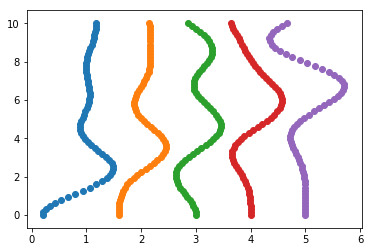

In [50]:
# plot the positions of the springs....

for i in range(N):
    #plt.scatter(soln.y[i,:], soln.t)
    plt.scatter(soln.y[i,:], soln.t)

2.2.2


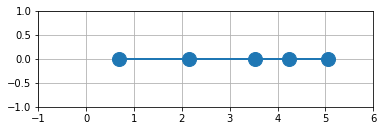

In [13]:
# animation boilerplate
# (export to .py)

ntimesteps = soln.t.shape[-1] # if all blocks are solved with same ntimesteps

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=True, xlim=(-1, N + 1), ylim=(-1,1))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2, markersize=14)

import matplotlib.animation as animation

def init():
    line.set_data([], [])
    return line,


NN = 2 ** 4 # display only every NN frames
def animate(i):
    line.set_data(soln.y[:N,i * NN].reshape(N,) ,np.zeros(N))
    return line,

ani = animation.FuncAnimation(fig, animate, ntimesteps // NN,
                            interval=10, repeat=True,
                            blit=True, init_func=init)
import matplotlib
print(matplotlib.__version__)
ani.save('springs.gif', writer='imagemagick')
from IPython.display import HTML
HTML(ani.to_html5_video())


In [14]:
ani.save('springs.gif', writer='imagemagick', fps=60)
